# とりえあずデータみてみる

In [11]:
import pandas as pd

In [154]:
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

In [155]:
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3778807,1552434660,3857.21,3857.68,3857.21,3857.59,0.542492,2092.640913,3857.456219
3778808,1552434720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778809,1552434780,3857.59,3858.17,3857.59,3858.17,0.297396,1147.336872,3857.939815
3778810,1552434840,3858.17,3858.17,3858.17,3858.17,0.048400,186.735428,3858.170000
3778811,1552434900,3857.80,3860.09,3857.59,3860.09,20.372100,78591.965693,3857.823469
3778812,1552434960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778813,1552435020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778814,1552435080,3860.09,3861.05,3860.09,3861.05,0.378637,1461.770077,3860.606378
3778815,1552435140,3860.18,3860.18,3859.74,3859.74,1.056403,4077.863045,3860.139080
3778816,1552435200,3861.37,3862.01,3861.37,3861.95,0.198124,765.149137,3861.967464


In [156]:
df.shape

(3778817, 8)

# グラフをみる

In [157]:
from datetime import datetime
df["Timestamp_UTC"] = df["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df = df.set_index("Timestamp_UTC")

In [158]:
df = df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume_(BTC)": "volume"
})

In [159]:
import cufflinks as cf
cf.set_config_file(offline=True)
red = cf.get_scales("dflt")[4]
green = cf.get_scales("dflt")[2]

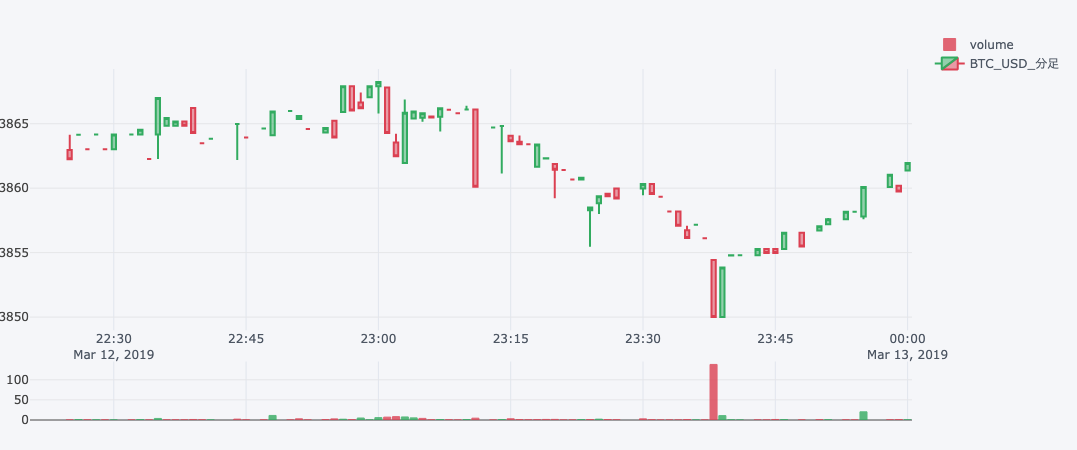

In [160]:
qf = cf.QuantFig(df.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_分足")

# １分毎は多すぎるので1日毎にする

In [161]:
how = {
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}
df_day = df.resample('D').agg(how)
df_day

,open,high,low,close,volume
Timestamp_UTC,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878
2012-01-01,4.58,5.00,4.58,5.00,21.602000
2012-01-02,5.00,5.00,5.00,5.00,19.048000
2012-01-03,5.32,5.32,5.14,5.29,88.037281
2012-01-04,4.93,5.57,4.93,5.57,107.233260
2012-01-05,5.72,6.65,5.72,6.65,94.801829
2012-01-06,6.65,6.90,6.00,6.00,33.882747
2012-01-07,6.80,6.80,6.80,6.80,0.295858
2012-01-08,6.90,7.00,6.90,7.00,5.000000


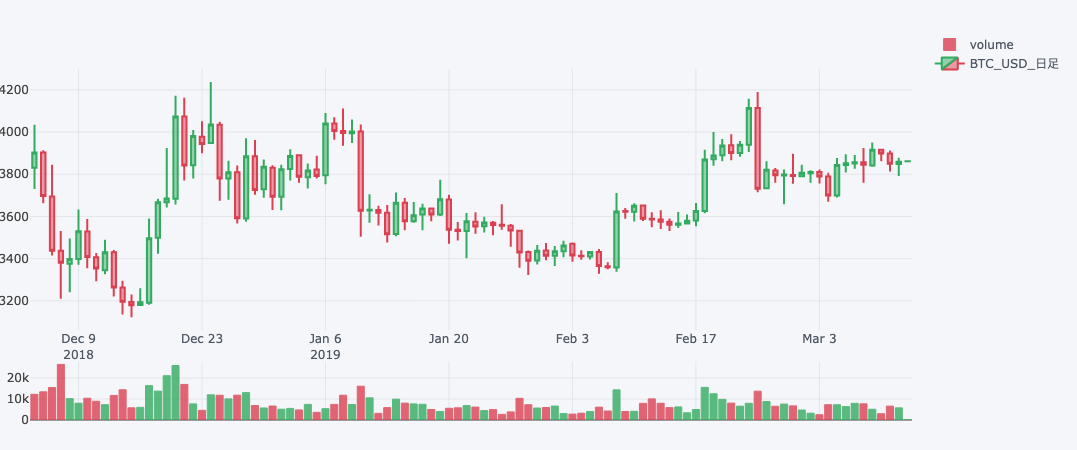

In [162]:
qf = cf.QuantFig(df_day.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_日足")

# 日経平均株価

In [185]:
n255 = pd.read_csv("./data/N225.csv")
n255["Timestamp_UTC"] = n255["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
n255 = n255.set_index("Timestamp_UTC")
n255 = n255.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})


In [186]:
n255

,Date,open,high,low,close,Adj Close,volume
Timestamp_UTC,,,,,,,
2012-01-04,2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,8560.110352,106000.0
2012-01-05,2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,8488.709961,77700.0
2012-01-06,2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,8390.349609,101300.0
2012-01-10,2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,8422.259766,112300.0
2012-01-11,2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,8447.879883,106200.0
2012-01-12,2012-01-12,8423.099609,8426.830078,8360.330078,8385.589844,8385.589844,84800.0
2012-01-13,2012-01-13,8471.099609,8509.759766,8458.679688,8500.019531,8500.019531,109800.0
2012-01-16,2012-01-16,8409.790039,8409.790039,8352.230469,8378.360352,8378.360352,76500.0
2012-01-17,2012-01-17,8420.120117,8475.660156,8413.219727,8466.400391,8466.400391,85500.0


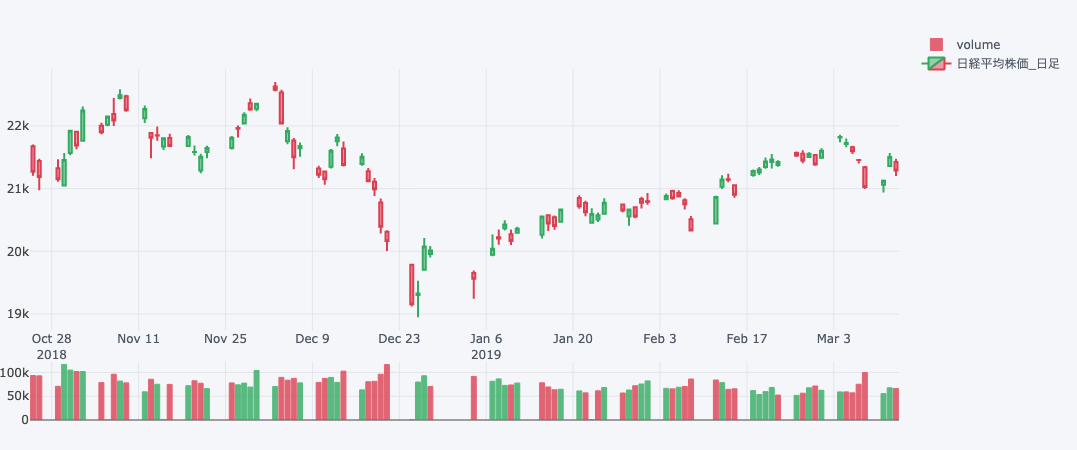

In [187]:
qf = cf.QuantFig(n255.tail(100))
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="日経平均株価_日足")

# 日経平均株価とBTCの相関をみる

## 欠損値を捨てる

In [201]:
XY = pd.merge(n255, df_day, on="Timestamp_UTC", how="inner")
XY = XY.dropna()
XY

,Date,open_x,high_x,low_x,close_x,Adj Close,volume_x,open_y,high_y,low_y,close_y,volume_y
Timestamp_UTC,,,,,,,,,,,,
2012-01-04,2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,8560.110352,106000.0,4.93,5.57,4.93,5.57,107.233260
2012-01-05,2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,8488.709961,77700.0,5.72,6.65,5.72,6.65,94.801829
2012-01-06,2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,8390.349609,101300.0,6.65,6.90,6.00,6.00,33.882747
2012-01-10,2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,8422.259766,112300.0,6.24,7.14,6.24,7.14,62.289980
2012-01-11,2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,8447.879883,106200.0,7.14,7.33,6.25,7.00,105.358934
2012-01-12,2012-01-12,8423.099609,8426.830078,8360.330078,8385.589844,8385.589844,84800.0,6.95,7.38,6.51,6.51,82.301632
2012-01-13,2012-01-13,8471.099609,8509.759766,8458.679688,8500.019531,8500.019531,109800.0,6.80,7.36,6.60,6.60,48.970145
2012-01-16,2012-01-16,8409.790039,8409.790039,8352.230469,8378.360352,8378.360352,76500.0,6.20,7.10,6.20,7.10,12.649296
2012-01-17,2012-01-17,8420.120117,8475.660156,8413.219727,8466.400391,8466.400391,85500.0,6.50,6.90,6.00,6.00,80.514008


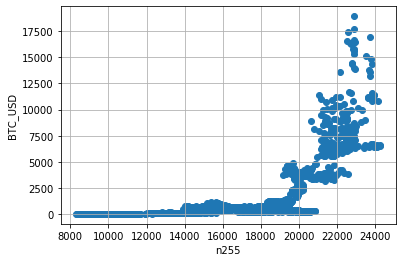

In [211]:
import matplotlib.pyplot as plt
X = XY["close_x"].to_frame()
Y = XY["close_y"].to_frame()
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.grid()
plt.show()

# 線形回帰する

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index <= split_time] ,Y[Y.index <= split_time] 
test_x,  test_y = X[split_time < X.index] ,Y[split_time < Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[[0.27122546]]
[-3322.77649535]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
-2.792372878803589


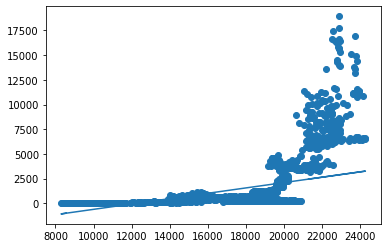

In [228]:
print(model.coef_)  #回帰変数の表示
print(model.intercept_)  #回帰直線の切片
print(model.get_params())  #パラメータの取得
print(model.score(test_x,test_y))  #決定係数の表示
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X))

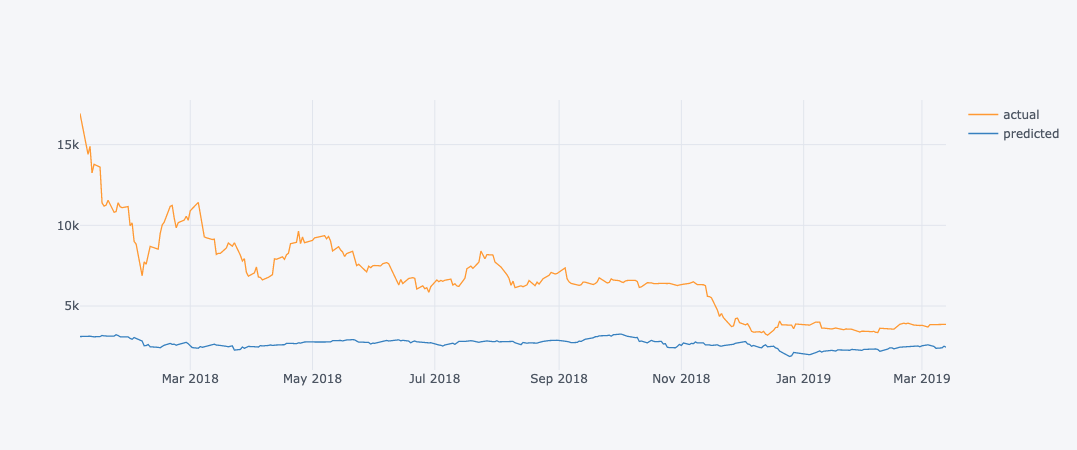

In [257]:
result = pd.DataFrame({
    "actual": test_y["close_y"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
})
result.iplot()

# 気になって調べたこと

- 時系列データの線形補完のやりかた
    - 今回は嘘のデータを混ぜたくないので使わない
    - [pandasで欠損値NaNを前後の値から補間するinterpolate | note.nkmk.me](https://note.nkmk.me/python-pandas-interpolate/)

```python
df.interpolate('time')
```

- OHLCデータは`cufflinks`ってやつ使うと簡単に描写できる
    - Open、High、Low、Closeのあるデータ、主に金融データ
    - [jupyter notebook上で金融データの描画・取得・操作 - Qiita](https://qiita.com/u1and0/items/6bc0dbeed0e20dd89eda)

- OHLCデータのタイムスタンプ単位は`resample`使うと簡単に変更できる

``` python
df.resample('H').agg(how)
```